# Checks to confirm that output from pre-processing RACMO data worked as expected

In [1]:
# load modules

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# define functions

def load_data(var, decade, year, part_num):
    
    #interim_dir = "/ec/res4/scratch/nld4814/FGRN055_era055/raw/historical-1957/"
    #interim_file = var + ".KNMI-"+str(decade)+".FGRN055.BN_RACMO2.3p2_FGRN055.3H.nc" # or evap.KNMI-1991.FGRN055.BN_RACMO2.3p2_ERA5_3h_FGRN055.3H.nc
    
    era5_dir = "/ec/res4/scratch/nld4814/FGRN055_era055/raw/historical-1939/"
    era5_file = var + ".KNMI-"+str(decade)+".FGRN055.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.3H.nc"
    
    years_dir = "/ec/res4/scratch/nld4814/FGRN055_era055/process-RACMO/years-1939/"
    years_file = var + "_FGRN055_era055_forFDM_Year" + str(year) + ".nc"
    
    parts_dir = "/ec/res4/scratch/nld4814/FGRN055_era055/process-RACMO/years-1939/parts/"
    parts_file = var + "_" + str(year) + "_part" + str(part_num) + ".nc"
    
    timeseries_dir = "/ec/res4/scratch/nld4814/FGRN055_era055/input/timeseries-1939/"
    timeseries_file = var + "_FGRN055_era055_1939-2023_p"+str(part_num)+".nc"
    
    averages_dir = "/ec/res4/scratch/nld4814/FGRN055_era055/input/averages/"
    averages_file = var + "_FGRN055_era055-1939_1940-1970_ave.nc"
    
    mask_dir = "/perm/nld4814/code/IMAU-FDM/reference/FGRN055/"
    mask_file = "FGRN055_Masks.nc"
    
    #ds_interim = xr.open_dataset(interim_dir+interim_file)
    #ds_era5 = xr.open_dataset(era5_dir+era5_file)
    ds_years = xr.open_dataset(years_dir+years_file)
    ds_parts = xr.open_dataset(parts_dir+parts_file)
    ds_ts = xr.open_dataset(timeseries_dir+timeseries_file)
    #ds_ave = xr.open_dataset(averages_dir+averages_file)
    #ds_mask = xr.open_dataset(mask_dir+mask_file)

    return ds_ts

def find_nans(ds,var):
    
    for i in range(0,ds[var].time.size):
        if ds[var].isel(time=i).isnull().sum()>0:
            print(np.datetime_as_string(ds.time.isel(time=i).values,unit="h"))
            print(i)


In [4]:
#ds_era5, ds_ts, ds_mask = load_data(var, decade, year, part_num)

### Mapping between rotated pole grids for data & mask

NameError: name 'ds_interim' is not defined

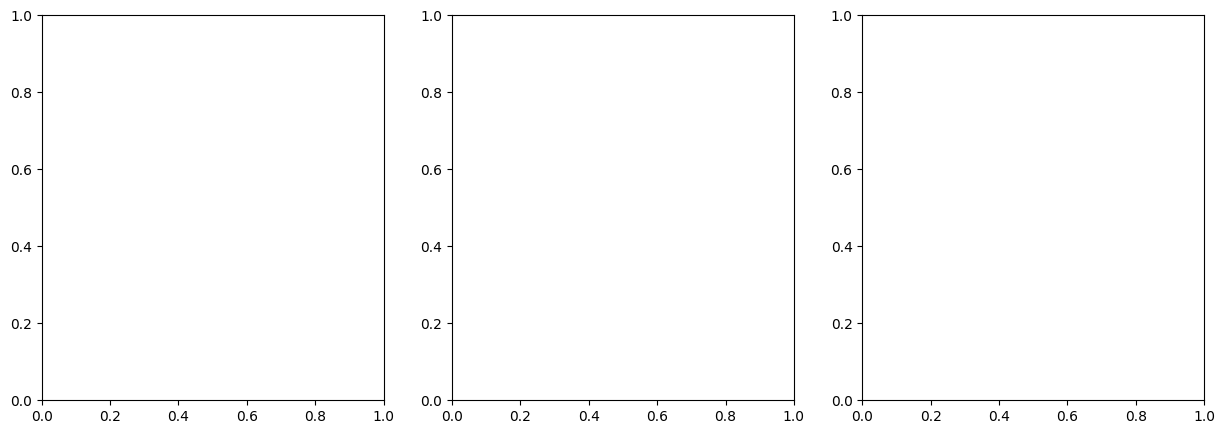

In [3]:
# Check rotated grid for interim, era5, and mask

fig, ax = plt.subplots(1,3,figsize=(15,5))

ds_interim[var].isel(time=0).plot(ax=ax[0])
ds_era5[var].isel(time=0).plot(ax=ax[1])
ds_mask.LSM.plot(ax=ax[2])

In [17]:
ds_mask.attrs['grid']

'Map Projection:Polar Stereographic Ellipsoid - Map Reference Latitude: 90.0 - Map Reference Longitude: -39.0 - Map Second Reference Latitude: 71.0 - Map Eccentricity: 0.081819190843 ;wgs84 - Map Equatorial Radius: 6378137.0 ;wgs84 meters - Grid Map Origin Column: 160 - Grid Map Origin Row: -120 - Grid Map Units per Cell: 5000 - Grid Width: 301 - Grid Height: 561'

In [11]:
ds_era5.rotated_pole

<xarray.DataArray 'rotated_pole' ()> Size: 4B
[1 values with dtype=float32]
Attributes:
    grid_mapping_name:          rotated_latitude_longitude
    grid_north_pole_latitude:   18.0
    grid_north_pole_longitude:  142.5
    proj4_params:               -m 57.295779506 +proj=ob_tran +o_proj=latlon ...
    proj_parameters:            -m 57.295779506 +proj=ob_tran +o_proj=latlon ...
    projection_name:            rotated_latitude_longitude
    long_name:                  projection details
    EPSG_code:

## Checking to see if there are any nans
Seeing NaNs in the timeseries data from 1979 and 1980, at least for snowfall. Check these in the original RACMO data and in other variables.

- 1975-09-01T00 (105192) to 1975-09-30T21 (105431)
- 1979-10-01T00 (117120) to 1979-10-31T21 (117367)
- 1980-03-01T00 (118336) to 1980-03-31T21 (118583)


In [41]:
var = "sndiv"
decade = 1971
year = 1979
part_num = 18

ds_era5, ds_years = load_data(var, decade, year, part_num)



In [16]:
ds_years[var].sel(time=np.datetime64('1979-10-03T00')).values

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [17]:
find_nans(ds_years,var)

In [4]:
ds_era5[var].sel(time=np.datetime64('1975-09-01T00')).values

array([[[-2.3015066e-06, -2.3015066e-06, -2.3015066e-06, ...,
         -9.5353034e-06, -9.5353034e-06, -9.5353034e-06],
        [-2.3015066e-06, -2.3015066e-06, -2.3015066e-06, ...,
         -9.5353034e-06, -9.5353034e-06, -9.5353034e-06],
        [-2.3015066e-06, -2.3015066e-06, -2.3015066e-06, ...,
         -8.8119241e-06, -8.8119241e-06, -8.8119241e-06],
        ...,
        [-2.3015066e-06, -2.3015066e-06, -2.3015066e-06, ...,
         -1.0982063e-05, -1.0982063e-05, -1.0982063e-05],
        [-2.3015066e-06, -2.3015066e-06, -2.3015066e-06, ...,
         -1.0982063e-05, -1.0982063e-05, -1.0982063e-05],
        [-1.5781269e-06, -2.3015066e-06, -2.3015066e-06, ...,
         -1.0982063e-05, -1.0982063e-05, -1.0982063e-05]]], dtype=float32)

In [10]:
# find nans in timeseries file and print

for i in range(0,ds_era5[var].time.size):
    if ds_era5[var].isel(time=i).isnull().sum()>0:
        print(np.datetime_as_string(ds_era5.time.isel(time=i).values,unit="h"))
        print(i)

# Check timeseries files to see if they look good
1. check for nans
2. check for continuity
3. check for magnitude

In [7]:
var = "evap"
decade = 1971
year = 1980
part_num = 72

#ds_years, ds_parts, ds_ts = load_data(var, decade, year, part_num)
ds_ts = load_data(var, decade, year, part_num)

In [15]:
find_nans(ds_years,var)

In [16]:
find_nans(ds_parts,var)

In [8]:
find_nans(ds_ts,var)

In [20]:
ds_ts[var].sel(time=np.datetime64('1980-03-09T00')).values

array([[[3.2678890e-05, 3.8465925e-05, 4.2806205e-05, 4.4252964e-05,
         4.7146485e-05, 4.7146485e-05],
        [3.5572408e-05, 4.2806205e-05, 4.4252964e-05, 4.7146485e-05,
         4.8593243e-05, 5.1486761e-05],
        [3.9912687e-05, 4.5699722e-05, 4.8593243e-05, 4.8593243e-05,
         5.0040002e-05, 5.0040002e-05],
        ...,
        [2.2969866e-06, 2.2969866e-06, 2.2969866e-06, 2.2969866e-06,
         2.2969866e-06, 2.2969866e-06],
        [2.2969866e-06, 2.2969866e-06, 2.2969866e-06, 2.2969866e-06,
         2.2969866e-06, 2.2969866e-06],
        [3.7437460e-06, 2.2969866e-06, 2.2969866e-06, 2.2969866e-06,
         2.2969866e-06, 2.2969866e-06]]], dtype=float32)

In [24]:
ds_ts

<xarray.Dataset> Size: 3GB
Dimensions:       (time: 246424, nblock1: 40, nblock2: 400, bnds: 2, rlat: 566,
                   rlon: 6, height: 1)
Coordinates:
  * height        (height) float64 8B 0.0
    lat           (rlat, rlon) float64 27kB ...
    lon           (rlat, rlon) float64 27kB ...
  * rlat          (rlat) float64 5kB -14.4 -14.35 -14.3 ... 13.75 13.8 13.85
  * rlon          (rlon) float64 48B -9.75 -9.7 -9.65 -9.6 -9.55 -9.5
  * time          (time) datetime64[ns] 2MB 1939-09-01 ... 2023-12-31T21:00:00
Dimensions without coordinates: nblock1, nblock2, bnds
Data variables:
    assigned      (time) int32 986kB ...
    block1        (nblock1) int32 160B ...
    block2        (nblock2) int32 2kB ...
    date_bnds     (time, bnds) int32 2MB ...
    dir           (rlat, rlon) float64 27kB ...
    dtg           (time) int32 986kB ...
    hms_bnds      (time, bnds) int32 2MB ...
    precip        (time, height, rlat, rlon) float32 3GB ...
    rotated_pole  float32 4B ...
    time_bnds     (time, bnds) datetime64[ns] 4MB ...
Attributes:
    Conventions:   CF-1.4
    source:        RACMO2
    Domain:        FGRN055
    Experiment:    BN_RACMO2.3p2_ERA5_3h_1940_FGRN055
    institution:   Royal Netherlands Meteorological Institute (KNMI)
    CreationDate:  Tue Apr 11 19:37:55 2023
    comment:       asim2cdf: cpar=precip, iwmo=61, ilvt=105, ilev=0, idh=3, i...
    title:         Total Precipitative Flux
    history:       Tue Jan 21 01:39:20 2025: ncrcat /ec/res4/scratch/nld4814/...
    NCO:           netCDF Operators version 5.1.9 (Homepage = http://nco.sf.n...

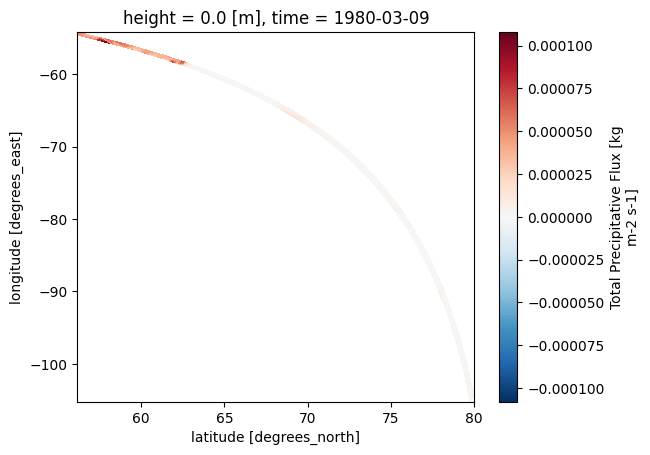

In [37]:
ds_ts[var].sel(time=np.datetime64('1980-03-09T00')).plot(x="lat",y="lon")

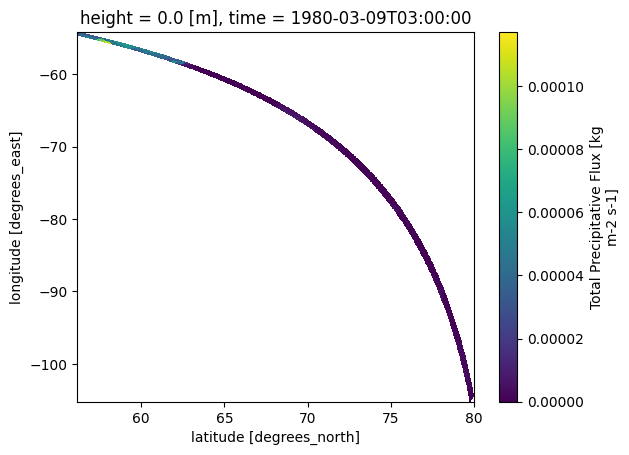

In [38]:
ds_ts[var].sel(time=np.datetime64('1980-03-09T03')).plot(x="lat",y="lon")

# Archive

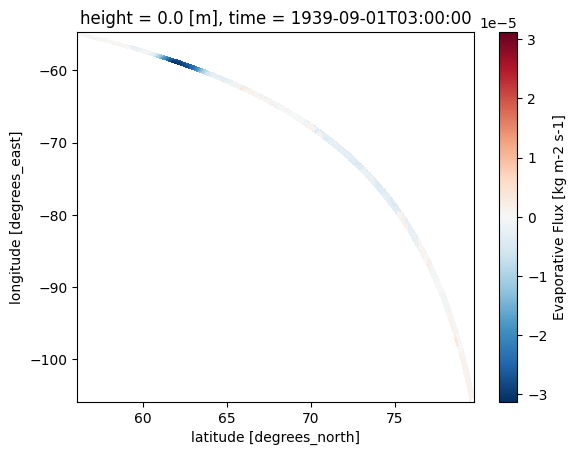

In [13]:
ds_ts[var].isel(time=1).plot(x="lat",y="lon")

TypeError: Colorbar.__init__() got an unexpected keyword argument 'vmin'

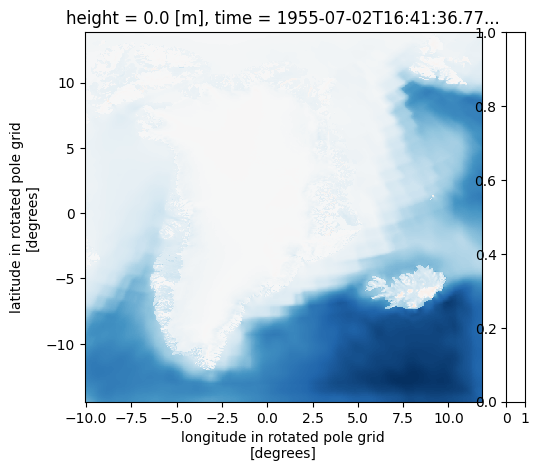

In [19]:
ds_ave[var].plot(cbar_kwargs={"vmin": -1})
